In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import os
import glob

In [2]:
filename = 'C:\Users\Magnus\PhD\Code\MATLAB\Scripts\15_Circumferential_iterations\features_table.txt'

SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape (<ipython-input-2-be66d3a0e059>, line 1)

In [3]:
filename = '/Users/Magnus/PhD/Code/MATLAB/Scripts/15_Circumferential_iterations/features_table.txt'

In [8]:
df_raw = pd.read_csv(filename)

In [9]:
df_raw

ModelThickMax  ModelThickMin  ModelThickDiff  ModelThickMedian  \
0               61             61               0                61   
1               61             61               0                61   
2               61             61               0                61   
3               61             61               0                61   
4               61             61               0                61   
..             ...            ...             ...               ...   
375             64             54              10                62   
376             64             54              10                62   
377             64             54              10                62   
378             64             54              10                62   
379             64             54              10                62   

     ModelThickMean  ModelThickStd  ModeVelCoeff  EnvelopeAvgTimeDiff  \
0         61.000000       0.000000          0.98             0.000087   
1         61.000000       0.000000          0.99             0.000087   
2         61.000000       0.000000          1.00             0.000086   
3         61.000000       0.000000          1.01             0.000085   
4         61.000000       0.000000          1.02             0.000084   
..              ...            ...           ...                  ...   
375       62.007812       1.712741          0.98             0.000088   
376       62.007812       1.712741          0.99             0.000087   
377       62.007812       1.712741          1.00             0.000087   
378       62.007812       1.712741          1.01             0.000086   
379       62.007812       1.712741          1.02             0.000085   

     EnvelopeAvgAmpReduc  PhaseDiffMean  Win4_PeakAmp  Win4_PeakFreq  \
0              -0.090215      -0.820041  1.241630e-06     47851.5625   
1              -0.089597      -0.553822  1.238296e-06     47851.5625   
2              -0.089083      -0.293270  1.224825e-06     46875.0000   
3              -0.088695      -0.038224  1.201823e-06     46875.0000   
4              -0.088149       0.211493  1.172012e-06     45898.4375   
..                   ...            ...           ...            ...   
375            -0.142693      -1.340801  9.852128e-07     47851.5625   
376            -0.141701      -1.071701  1.004633e-06     47851.5625   
377            -0.141468      -0.808561  1.013324e-06     47851.5625   
378            -0.141093      -0.550537  1.011723e-06     46875.0000   
379            -0.140091      -0.299274  9.999266e-07     46875.0000   

     Win4_fwhmFreqRange  
0            30273.4375  
1            31250.0000  
2            31250.0000  
3            31250.0000  
4            31250.0000  
..                  ...  
375          30273.4375  
376          30273.4375  
377          30273.4375  
378          30273.4375  
379          29296.8750  

[380 rows x 13 columns]

In [10]:
corr = df_raw.corr()

In [11]:
corr.style.background_gradient(cmap='coolwarm')

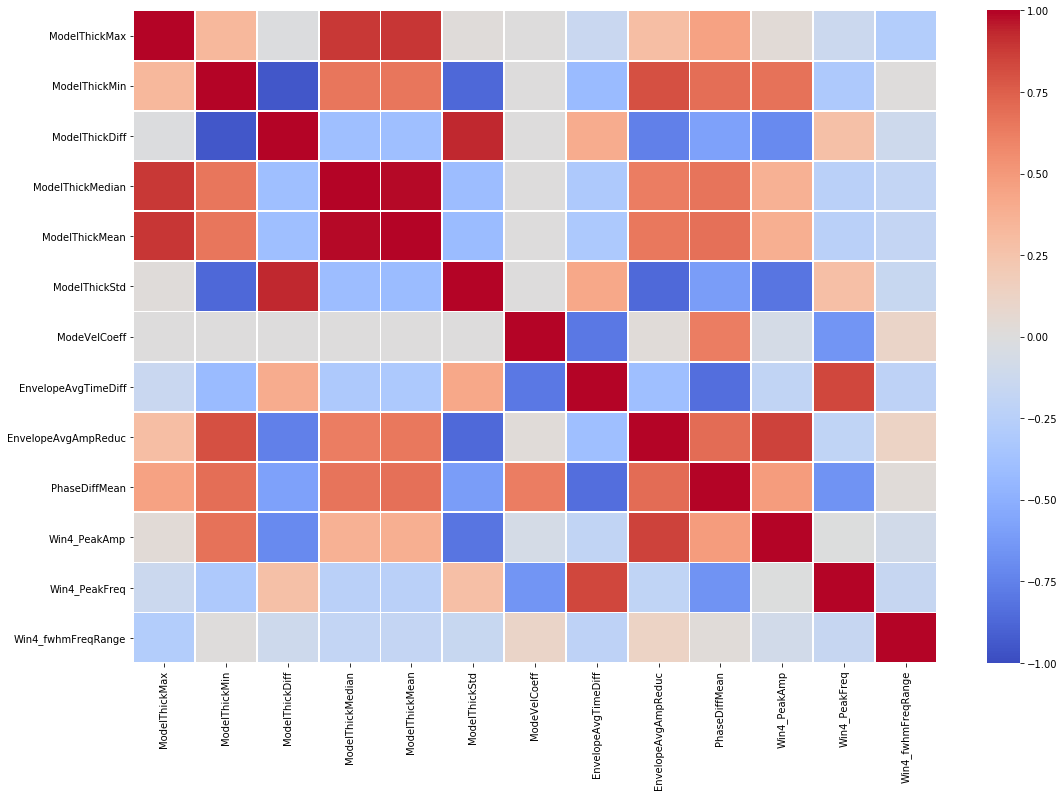

In [12]:
f, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(corr, vmin=-1, vmax=1, fmt='g', cmap='coolwarm', linewidths=0.75 );

## Clean up cells

In [24]:
df_raw.columns

Index(['ModelThickMax', 'ModelThickMin', 'ModelThickDiff', 'ModelThickMedian',
       'ModelThickMean', 'ModelThickStd', 'ModeVelCoeff',
       'EnvelopeAvgTimeDiff', 'EnvelopeAvgAmpReduc', 'PhaseDiffMean',
       'Win4_PeakAmp', 'Win4_PeakFreq', 'Win4_fwhmFreqRange'],
      dtype='object')

In [26]:
df = df_raw.drop(['ModelThickMax', 'ModelThickMin', 'ModelThickDiff', 'ModelThickMedian'], axis=1)

In [27]:
df.columns

Index(['ModelThickMean', 'ModelThickStd', 'ModeVelCoeff',
       'EnvelopeAvgTimeDiff', 'EnvelopeAvgAmpReduc', 'PhaseDiffMean',
       'Win4_PeakAmp', 'Win4_PeakFreq', 'Win4_fwhmFreqRange'],
      dtype='object')

In [13]:
from sklearn import linear_model

In [16]:
from sklearn.model_selection import train_test_split

In [28]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [29]:
train_set

ModelThickMean  ModelThickStd  ModeVelCoeff  EnvelopeAvgTimeDiff  \
77        59.072655       1.595107          1.00             0.000087   
220       61.285938       1.178166          0.98             0.000088   
297       63.011719       0.730666          1.00             0.000085   
113       61.052345       0.729954          1.01             0.000085   
203       62.060158       0.732560          1.01             0.000085   
..              ...            ...           ...                  ...   
71        58.960938       1.674919          0.99             0.000088   
106       61.017967       0.730539          0.99             0.000087   
270       61.017189       1.773672          0.98             0.000087   
348       62.027344       1.667901          1.01             0.000086   
102       61.077343       0.733080          1.00             0.000086   

     EnvelopeAvgAmpReduc  PhaseDiffMean  Win4_PeakAmp  Win4_PeakFreq  \
77             -0.154891      -1.369272  9.906604e-07     47851.5625   
220            -0.143042      -1.231450  1.038375e-06     47851.5625   
297            -0.104810       0.047232  1.074420e-06     45898.4375   
113            -0.114350      -0.148511  1.100280e-06     45898.4375   
203            -0.115570       0.068608  1.064017e-06     45898.4375   
..                   ...            ...           ...            ...   
71             -0.147499      -1.750391  1.021054e-06     48828.1250   
106            -0.115282      -0.671808  1.149115e-06     46875.0000   
270            -0.159450      -1.505736  9.353810e-07     46875.0000   
348            -0.138268      -0.525542  1.004022e-06     46875.0000   
102            -0.120242      -0.415772  1.107304e-06     46875.0000   

     Win4_fwhmFreqRange  
77           32226.5625  
220          30273.4375  
297          32226.5625  
113          31250.0000  
203          31250.0000  
..                  ...  
71           31250.0000  
106          31250.0000  
270          31250.0000  
348          30273.4375  
102          30273.4375  

[304 rows x 9 columns]

In [30]:
test_set

ModelThickMean  ModelThickStd  ModeVelCoeff  EnvelopeAvgTimeDiff  \
266       60.789845       1.750788          0.99             0.000088   
261       60.922657       1.728966          0.99             0.000088   
265       60.789845       1.750788          0.98             0.000089   
39        59.129688       1.453601          1.02             0.000085   
33        59.431252       1.165020          1.01             0.000086   
..              ...            ...           ...                  ...   
316       62.450783       1.164667          0.99             0.000087   
63        59.093750       1.544935          1.01             0.000086   
229       61.178123       1.468296          1.02             0.000085   
82        58.977345       1.706892          1.00             0.000086   
94        59.060936       1.630257          1.02             0.000085   

     EnvelopeAvgAmpReduc  PhaseDiffMean  Win4_PeakAmp  Win4_PeakFreq  \
266            -0.150461      -1.381737  1.023370e-06     48828.1250   
261            -0.153249      -1.312565  1.004498e-06     47851.5625   
265            -0.151040      -1.656948  1.000148e-06     48828.1250   
39             -0.164939      -0.915253  9.636096e-07     44921.8750   
33             -0.157211      -0.899793  1.016796e-06     46875.0000   
..                   ...            ...           ...            ...   
316            -0.143670      -0.678803  9.777701e-07     46875.0000   
63             -0.155642      -1.099301  9.812873e-07     46875.0000   
229            -0.153921      -0.328196  9.507083e-07     44921.8750   
82             -0.178593      -1.620298  9.232214e-07     46875.0000   
94             -0.157329      -0.860172  9.513241e-07     45898.4375   

     Win4_fwhmFreqRange  
266          31250.0000  
261          30273.4375  
265          31250.0000  
39           32226.5625  
33           31250.0000  
..                  ...  
316          31250.0000  
63           32226.5625  
229          30273.4375  
82           32226.5625  
94           33203.1250  

[76 rows x 9 columns]

In [21]:
import sklearn
print(sklearn.__version__)

0.22.1


In [31]:
# https://machinelearningmastery.com/multi-output-regression-models-with-python/

In [37]:
X_train = train_set[['EnvelopeAvgTimeDiff', 'EnvelopeAvgAmpReduc', 'PhaseDiffMean', 'Win4_PeakAmp', 'Win4_PeakFreq', 'Win4_fwhmFreqRange']]
y_train = train_set[['ModelThickMean', 'ModelThickStd', 'ModeVelCoeff']]
X_test = test_set[['EnvelopeAvgTimeDiff', 'EnvelopeAvgAmpReduc', 'PhaseDiffMean', 'Win4_PeakAmp', 'Win4_PeakFreq', 'Win4_fwhmFreqRange']]
y_test = test_set[['ModelThickMean', 'ModelThickStd', 'ModeVelCoeff']]

In [39]:
X_train

EnvelopeAvgTimeDiff  EnvelopeAvgAmpReduc  PhaseDiffMean  Win4_PeakAmp  \
77              0.000087            -0.154891      -1.369272  9.906604e-07   
220             0.000088            -0.143042      -1.231450  1.038375e-06   
297             0.000085            -0.104810       0.047232  1.074420e-06   
113             0.000085            -0.114350      -0.148511  1.100280e-06   
203             0.000085            -0.115570       0.068608  1.064017e-06   
..                   ...                  ...            ...           ...   
71              0.000088            -0.147499      -1.750391  1.021054e-06   
106             0.000087            -0.115282      -0.671808  1.149115e-06   
270             0.000087            -0.159450      -1.505736  9.353810e-07   
348             0.000086            -0.138268      -0.525542  1.004022e-06   
102             0.000086            -0.120242      -0.415772  1.107304e-06   

     Win4_PeakFreq  Win4_fwhmFreqRange  
77      47851.5625          32226.5625  
220     47851.5625          30273.4375  
297     45898.4375          32226.5625  
113     45898.4375          31250.0000  
203     45898.4375          31250.0000  
..             ...                 ...  
71      48828.1250          31250.0000  
106     46875.0000          31250.0000  
270     46875.0000          31250.0000  
348     46875.0000          30273.4375  
102     46875.0000          30273.4375  

[304 rows x 6 columns]

In [40]:
y_test

ModelThickMean  ModelThickStd  ModeVelCoeff
266       60.789845       1.750788          0.99
261       60.922657       1.728966          0.99
265       60.789845       1.750788          0.98
39        59.129688       1.453601          1.02
33        59.431252       1.165020          1.01
..              ...            ...           ...
316       62.450783       1.164667          0.99
63        59.093750       1.544935          1.01
229       61.178123       1.468296          1.02
82        58.977345       1.706892          1.00
94        59.060936       1.630257          1.02

[76 rows x 3 columns]

In [42]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(304, 6) (304, 3)
(76, 6) (76, 3)


## Linear Regression

In [44]:
model = linear_model.LinearRegression()

In [45]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [46]:
y_hat = model.predict(X_test)

In [48]:
y_hat.shape

(76, 3)

In [51]:
from sklearn.metrics import mean_squared_error

In [72]:
mse_ModelThickMean = mean_squared_error(y_test[['ModelThickMean']], y_hat[:,0])
mse_ModelThickStd = mean_squared_error(y_test[['ModelThickStd']], y_hat[:,1])
mse_ModelVelCoeff = mean_squared_error(y_test[['ModeVelCoeff']], y_hat[:,2])
rmse_ModelThickMean = np.sqrt(mse_ModelThickMean)
rmse_ModelThickStd = np.sqrt(mse_ModelThickStd)
rmse_ModelVelCoeff = np.sqrt(mse_ModelVelCoeff)


In [73]:
rmse_ModelThickMean, rmse_ModelThickStd, rmse_ModelVelCoeff

(0.537171474375675, 0.20742651056368092, 0.0059025682013853)

## Decision Tree Regression

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [76]:
y_hat_tree_reg = tree_reg.predict(X_test)

In [78]:
mse_tree_reg_ModelThickMean = mean_squared_error(y_test[['ModelThickMean']], y_hat_tree_reg[:,0])
mse_tree_reg_ModelThickStd = mean_squared_error(y_test[['ModelThickStd']], y_hat_tree_reg[:,1])
mse_tree_reg_ModelVelCoeff = mean_squared_error(y_test[['ModeVelCoeff']], y_hat_tree_reg[:,2])
rmse_tree_reg_ModelThickMean = np.sqrt(mse_tree_reg_ModelThickMean)
rmse_tree_reg_ModelThickStd = np.sqrt(mse_tree_reg_ModelThickStd)
rmse_tree_reg_ModelVelCoeff = np.sqrt(mse_tree_reg_ModelVelCoeff)

In [79]:
rmse_tree_reg_ModelThickMean, rmse_tree_reg_ModelThickStd, rmse_tree_reg_ModelVelCoeff

(0.642450498016322, 0.17317310144844264, 0.009248035070275242)

## Random Forest Regression

In [80]:
from sklearn.ensemble import RandomForestRegressor

In [81]:
forest_reg = RandomForestRegressor()

In [82]:
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [83]:
y_hat_forest_reg = forest_reg.predict(X_test)

In [86]:
mse_forest_reg_ModelThickMean = mean_squared_error(y_test[['ModelThickMean']], y_hat_forest_reg[:,0])
mse_forest_reg_ModelThickStd = mean_squared_error(y_test[['ModelThickStd']], y_hat_forest_reg[:,1])
mse_forest_reg_ModelVelCoeff = mean_squared_error(y_test[['ModeVelCoeff']], y_hat_forest_reg[:,2])
rmse_forest_reg_ModelThickMean = np.sqrt(mse_forest_reg_ModelThickMean)
rmse_forest_reg_ModelThickStd = np.sqrt(mse_forest_reg_ModelThickStd)
rmse_forest_reg_ModelVelCoeff = np.sqrt(mse_forest_reg_ModelVelCoeff)

In [87]:
rmse_forest_reg_ModelThickMean, rmse_forest_reg_ModelThickStd, rmse_forest_reg_ModelVelCoeff

(0.4820409894054825, 0.1356061805987431, 0.005558949068250045)

## Scaling

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [103]:
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

In [104]:
scaler_X.fit(X_train)
scaler_y.fit(y_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [107]:
#print(scaler_X.transform(X_test))

In [109]:
#print(scaler_y.transform(y_test))

In [114]:
X_scaled = scaler_X.transform(X_train)
y_scaled = scaler_y.transform(y_train)

### Random forest

In [120]:
forest_reg_scaled = RandomForestRegressor()
forest_reg_scaled.fit(X_scaled, y_scaled)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [121]:
y_hat_forest_reg_scaled = forest_reg_scaled.predict(scaler_X.transform(X_test))

In [129]:
rmse_forest_scaled_scaler_ModelThickMean = np.sqrt(mean_squared_error(y_test[['ModelThickMean']], scaler_y.inverse_transform(y_hat_forest_reg_scaled)[:,0]))
rmse_forest_scaled_scaler_ModelThickStd = np.sqrt(mean_squared_error(y_test[['ModelThickStd']], scaler_y.inverse_transform(y_hat_forest_reg_scaled)[:,1]))
rmse_forest_scaled_scaler_ModelVelCoeff = np.sqrt(mean_squared_error(y_test[['ModeVelCoeff']], scaler_y.inverse_transform(y_hat_forest_reg_scaled)[:,2]))

In [130]:
rmse_forest_scaled_scaler_ModelThickMean, rmse_forest_scaled_scaler_ModelThickStd, rmse_forest_scaled_scaler_ModelVelCoeff

(0.4836281565063419, 0.14653504295770658, 0.004905631178255318)

### Decision tree

In [131]:
tree_reg_scaled = DecisionTreeRegressor()
tree_reg_scaled.fit(X_scaled, y_scaled)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [132]:
y_hat_tree_reg_scaled = tree_reg_scaled.predict(scaler_X.transform(X_test))

In [133]:
rmse_tree_scaled_scaler_ModelThickMean = np.sqrt(mean_squared_error(y_test[['ModelThickMean']], scaler_y.inverse_transform(y_hat_tree_reg_scaled)[:,0]))
rmse_tree_scaled_scaler_ModelThickStd = np.sqrt(mean_squared_error(y_test[['ModelThickStd']], scaler_y.inverse_transform(y_hat_tree_reg_scaled)[:,1]))
rmse_tree_scaled_scaler_ModelVelCoeff = np.sqrt(mean_squared_error(y_test[['ModeVelCoeff']], scaler_y.inverse_transform(y_hat_tree_reg_scaled)[:,2]))

In [134]:
rmse_tree_scaled_scaler_ModelThickMean, rmse_tree_scaled_scaler_ModelThickStd, rmse_tree_scaled_scaler_ModelVelCoeff

(0.6173978053709802, 0.17611479583403183, 0.005735387877066592)

### Linear regression

In [135]:
model_scaled = linear_model.LinearRegression()

In [136]:
model_scaled.fit(X_scaled, y_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [138]:
y_hat_linreg_scaled = model_scaled.predict(scaler_X.transform(X_test))

In [139]:
rmse_linreg_scaled_scaler_ModelThickMean = np.sqrt(mean_squared_error(y_test[['ModelThickMean']], scaler_y.inverse_transform(y_hat_linreg_scaled)[:,0]))
rmse_linreg_scaled_scaler_ModelThickStd = np.sqrt(mean_squared_error(y_test[['ModelThickStd']], scaler_y.inverse_transform(y_hat_linreg_scaled)[:,1]))
rmse_linreg_scaled_scaler_ModelVelCoeff = np.sqrt(mean_squared_error(y_test[['ModeVelCoeff']], scaler_y.inverse_transform(y_hat_linreg_scaled)[:,2]))

In [141]:
rmse_linreg_scaled_scaler_ModelThickMean, rmse_linreg_scaled_scaler_ModelThickStd, rmse_linreg_scaled_scaler_ModelVelCoeff

(0.5371714744773991, 0.20742651056119132, 0.005902568201505155)

In [142]:
rmse_ModelThickMean, rmse_ModelThickStd, rmse_ModelVelCoeff

(0.537171474375675, 0.20742651056368092, 0.0059025682013853)

In [144]:
y_hat_forest_reg[:,0]

array([60.69626606, 60.90950069, 59.73923447, 59.26462559, 59.77415749,
       61.99056263, 59.09092987, 60.88515663, 62.0045779 , 59.92229557,
       60.8006958 , 63.86      , 60.56890617, 61.03929649, 60.96710175,
       61.92200722, 60.69670452, 59.35610168, 60.74746864, 59.1983197 ,
       60.53836727, 60.79582874, 61.92522602, 61.14      , 59.18656994,
       60.67904037, 59.73728943, 60.12328907, 60.7622113 , 59.47889812,
       62.00660229, 59.73923447, 60.29481266, 61.36240555, 63.25003124,
       60.68855465, 60.09735237, 60.89120342, 61.41061745, 61.84717194,
       60.50903927, 61.86517998, 60.05705559, 60.22423477, 61.66007076,
       62.06256203, 61.78132793, 59.59922665, 59.45054672, 63.02940647,
       59.02754761, 61.89953224, 61.79596897, 61.88818684, 62.10922634,
       60.51800793, 59.99699211, 59.56464016, 60.53886852, 61.16130501,
       59.67211735, 60.25943027, 61.26104637, 60.85933655, 61.83321014,
       59.25242188, 60.58391422, 61.24      , 60.12523518, 61.68

In [148]:
y_test[['ModelThickMean']]

ModelThickMean
266       60.789845
261       60.922657
265       60.789845
39        59.129688
33        59.431252
..              ...
316       62.450783
63        59.093750
229       61.178123
82        58.977345
94        59.060936

[76 rows x 1 columns]